Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 2 </h2>
    <h1> Clustering </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: 15 de septiembre
    </p>
    <br>
</center>

<br>

---

## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.

---

## Librerías

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar
from sklearn import (preprocessing, decomposition, neighbors, model_selection, manifold) 
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from umap.umap_ import UMAP
from matplotlib import offsetbox
import matplotlib.cm as cm

# Parte 1: Carga y Preprocesamiento de Datos (10 pts.)

## 1.1 Carga de Datos

Para esta tarea deberás trabajar con el dataset de Kaggle [dataset](https://www.kaggle.com/datasets/rajyellow46/wine-quality?resource=download).

In [42]:
sample = pd.read_csv('winequalityN.csv')
sample.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1.2 Descripción del dataset (2 pts.)

¿Qué representan los atributos del dataset? Descríbelo y menciona características generales.

Dentro del dataSet "WineQuatilyN" se encuentran 12 atributos, los cuales son:
* type: Tipo de vino
* fixed acidity
* volatile acidity	
* citric acid	
* residual sugar	
* chlorides	
* free sulfur dioxide	
* total sulfur dioxide	
* density	
* pH	
* sulphates	
* alcohol	
* quality

El dataset esta relacionado con las variantes de vinos rojas y verdes del "Vinho Verde" portugués. 
Gran parte de las variables describen caracteristicas quimicas segun el tipo de vino. Ademas, tenemos una variable llamada "quality" que representa la calidad del vino segun la escala de 0 a 10. 



## 1.3 Manejo de Variables Cualitativas (2 pts.)

En el set de datos existen columnas con valores no numéricos que deberás manipular antes para poder utilizarlas de buena manera. Para esto utiliza las técnicas vistas en clases

In [43]:
sample
# Como podemos notar, existe la variable type, la cual es categórica ('red', 'white'), por lo que debemos convertirla a numérica
# Para ello, red => 0 y white => 1
sample['type'] = sample['type'].replace('red', 0)
sample['type'] = sample['type'].replace('white', 1)
sample

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Esto nos permite trabajar solo con variables numericas, lo cual es necesario para poder realizar el clustering.

## 1.4 Limpieza del set de datos (4 pts.)

Ahora debes limpiar el set de datos. Para ello deberás emplear técnicas para encontrar valores nulos, outliers, atributos incompletos o características que no sean útiles para el manejo de datos. Recuerda **justificar** tus métodos y decisiones.

In [44]:
# Ahora podemos notar que existen valores nulos dentro del set de datos
sample.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [45]:
# Por lo tanto, eliminaremos en primer lugar estas filas con valores nulos del set de datos
sample_cleaned = sample.dropna()
sample_cleaned.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [46]:
# Ademas, podemos notar que el atributo quality no es tan relevante para predecir el tipo de vino, ya que utilizaremos solamente 
# las caracteristicas esenciales, como pH, densidad, alcohol, etc.
# Por lo tanto, eliminaremos este atributo del set de datos
y = sample_cleaned['quality']
# Pero, utilizaremos este atributos como variable de respuestas para graficar los datos. 
sample_cleaned = sample_cleaned.drop(['quality'], axis=1)

In [47]:
sample_cleaned.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,0.753520,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825
std,0.430995,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


## 1.5 Normalización de datos (2 pts.)

Normaliza las columnas del set de datos que consideres necesarias. **Justifica** tus decisiones.

Finalmente responde: ¿Por qué es útil normalizar en el caso de un modelo de clustering?

In [48]:
# Considere normalizar todos los datos dentro del dataset, ya que al realizar un escalamiento de los datos
# permite tener una mejora en el modelo de clustering, presentando a todos los datos en una misma escala
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'density', 'sulphates', 'alcohol']
scaler = preprocessing.MinMaxScaler()
sample_cleaned[columns] = scaler.fit_transform(sample_cleaned[columns])
X_normalized = sample_cleaned

Al normalizar con MinMaxScaler nos permite asegurarnos que los datos se encuentren dentro de un intervalo filo. Normalizar los datos para un modelo de clustering
es muy util, ya que si los datos se encuentran en un mismo rango, entonces en el momento de graficarlos podemos 
ver una distribucion de los datos clara y no tan dispersa. Para poder agrupar los datos dentro en determinados clusters, necesitamos establecer un criterio general, y para ello los datos deben
presentar una distribucion similar. 


# Parte 2: t-SNE y UMAP (14 pts.)

## 2.1 t-SNE (1 pts.)

Define t-SNE con 2 componentes. Justifica la elección del parámetro **perplexity**.

In [49]:
print(X_normalized.shape)
# Tome un valor de perplexity de 50, ya que cuando este era mas bajo, la dispersion de datos era menos agrupada, 
# por lo que para visualizar los datos de mejor manera, y posteriormente analizarlos de manera global, considere un valor de perplexity alto. 
# Ademas, que a mayor perplexity, mas cantidad de vecinos cercanos por datos tendremos (mayor varianza)
tsne_embed = manifold.TSNE(n_components=2, perplexity = 50, n_iter=500, n_iter_without_progress=150, n_jobs=10) 
projection_tsne = tsne_embed.fit_transform(X_normalized, y)


(6463, 12)


/usr/local/Caskroom/miniforge/base/envs/dm/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Caskroom/miniforge/base/envs/dm/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## 2.2 UMAP (1 pts.)

Define UMAP con 2 componentes. Puedes reducir la cantidad de datos para UMAP si estimas necesario. Justifica la elección de parámetros.

In [50]:
umap_2d = UMAP(n_components = 2, min_dist = 1, n_neighbors= 50, n_jobs=8)
projection_umap = umap_2d.fit_transform(X_normalized, y)
# Escogemos una cantidad minima de distancia como 1, ya que a mayor valor podemos visualizar la agrupacion de datos mas distribuida.
# Cuando escogiamos un valor de distancia menor, la agrupacion de datos era muy cercana y no era posible distinguirlos.  
# Ademas presentamos n_neighbors = 50, como la cantidad de vecinos cercanos, asumiendo que en promedio, dada la cantidad de datos totales y las caracteristicas, 
# cada caracteristica deberia tener 50 muestras cercanas a ella.


## 2.3 Visualización en dos dimensiones (6 pts.)

Grafica los embeddings producidos en la sección 2.1 y 2.2. Una vez obtenido los gráficos, responde para cada uno:
* ¿El valor escogido de perplexity puede mejorar? (Solo para t-SNE)
* ¿Crees que se lleve a cabo una buena clusterización?
* ¿Cuántos clusters crees que van a resultar en la mejor clusterización?

In [51]:
# Grafico que muestra la proyeccion de los datos utilizando t-SNE y UMAP
def plot_embedding(X,title):
    _, ax = plt.subplots(figsize=(8, 8))

    for digit in np.unique(y):
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.425,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 5e-8:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
    ax.set_title(title)
    ax.axis("off")


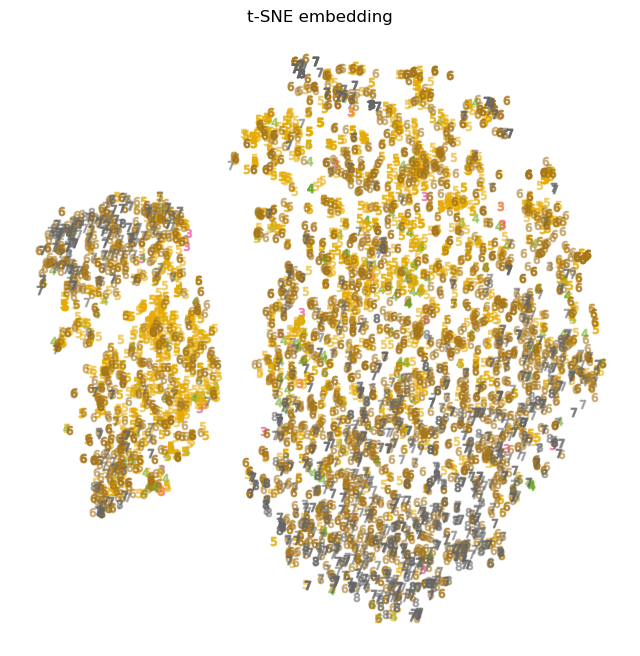

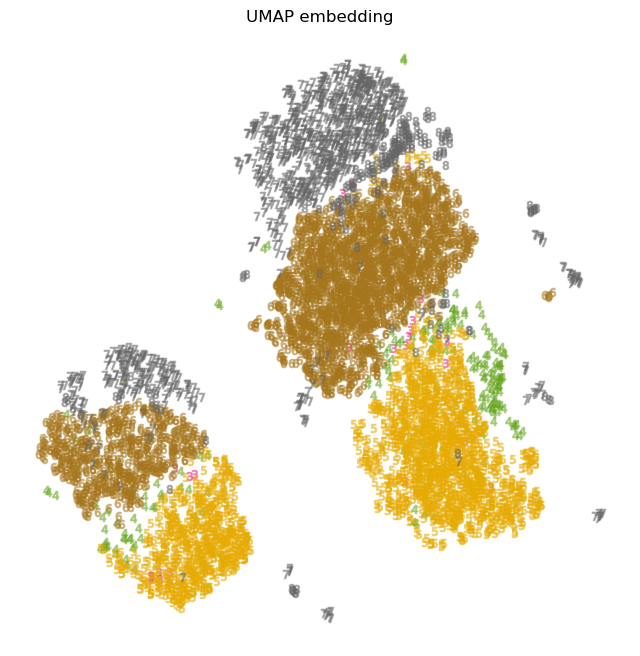

In [52]:
plot_embedding(projection_tsne, "t-SNE embedding")
plot_embedding(projection_umap, "UMAP embedding")


### t-SNE
👉🏻 Probablemente en la mejor clusterizacion resultaran 3 clusters. 

* Podemos notar que para el caso de la tecnica TSNE, se logra observar una gran agrupacion de datos , y luego otra agrupacion pequeña. Esta ultima agrupacion, una cierta cantidad de datos se presenta un poco menos agrupada (lo podemos notar en base a la concentracion de datos dentro del espacio). 

* El valor de perplexity en este caso no es posible mejorarlo. Aumentando el valor a 100, 200, igualmente el grafico se mantiene con las misma distribucion de los datos dentro del espacio 2D. Solo se logra distinguir visualmente 3 agrupaciones de datos (1 grande, una intermedia y una pequeña a la izquierda de la agrupacion intermedia). 
Cuando este parametro disminuye su valor, los datos se agrupaban en un solo grupo, por lo que no se podria analizar a nivel global, si no que a nivel local.


* Probablemente, no creo que se realice una buena clusterizacion utilizando la tecnica de t-SNE, ya que los datos se encuentran mas dispersos y no se logra distinguir una buena separacion entre los datos. Ademas, se encuentra mas desordenado que el embedding de UMAP. 


### UMAP
👉🏻 Probablemente en la mejor clusterizacion resultaran 3 clusters.

* En el caso de la tecnica UMAP, es posible observar tres concentraciones de datos: (1) concentracion que agrupa los valores 6, 5 y 7 (en general); (2) concentracion que agrupa los valores 4 y 5 (en general); (3) concentracion que agrupa los valores 6 y 7 (en general).

*  Probablemente utilizando la tecnica UMAP se lleve una mejor clusterizacion que t-SNE, 
ya que se puede observar una mayor separacion entre los datos (segun la clase a la que pertenecen del vector de respuesta quality) y ordenamiento. 
Es posible distinguir los grupos de datos que mas presentan caracteristicas en comun en base a la calidad que estos presentan (0 a 10). 

## 2.4 Análisis del algoritmo t-SNE (3 pts.)

Responde: ¿Crees que observar el gráfico de t-SNE te da una idea acertada de cómo es la estructura del set de datos en más dimensiones? ¿Qué características de t-SNE permiten esto?

👉🏻 El grafico de t-SNE da una intuicion de como se podria visualizar asertadamente el set de datos en mas dimensiones, pero no es posible asegurar que sea la correcta. En este sentido, como t-SNE es una tecnica que mantiene la distancia de cada dato con respecto a sus vecinos cercanos, no necesariamente se puede asegurar que los datos que se encuentran mas cerca en el grafico, sean los que se encuentran mas cerca en el espacio de mayor dimension. 

Las caracteristicas que permiten esto, es que t-SNE es una tecnica que mantiene la distancia de cada dato con respecto a sus vecinos cercanos, por lo que es posible observar una agrupacion de datos en base a la distancia que estos presentan entre si. Asimismo, esl modelo reducido con la tecnica t-SNE puede ser regulado por el parametro _perplexity_, el cual permite regular la complejidad de la proyeccion (la cantidad de vecinos cercanos que queremos considerar para cada dato). 

Ademas, t-SNE no es una tecnica de reduccion de la dimensional que retenga de mejor manera la varianza, por lo que la dispersion de los datos tambien puede ser representada de manera distinta. Su principal objetivo es mantener las distancias, no la varianza. 

## 2.5 Análisis del algoritmo UMAP (3 pts.)

Responde: ¿Crees que observar el gráfico de UMAP te da una idea acertada de cómo es la estructura del set de datos en más dimensiones? ¿Qué características de UMAP permiten esto?

👉🏻 El grafico de UMAP podria dar una mejor idea acertada que el grafico de t-SNE, ya que este preserva la estructura local al momento de mapear los datos de un espacio de mayor dimensionalidad a uno de menor dimensionalidad en base. Ademas, como construye un grafo que representa los datos del data set, tal que asigne cada dato como un nodo, relacionando sus vecinos cercanos mediante aristas. Esto permite que se pueda preservar la estructura del data set. 

La creacion de un grafo que logre preservar la estructura del set de datos para luego proyectarla en un espacio de menor dimensionalidad, es una de las caracteristicas que permiten que el grafico de UMAP sea probablemente un poco mas acertado. 

# Parte 3: K-Means (18 pts.)

En esta sección debes trabajar con los 2 modelos obtenidos en la sección anterior, y crear un nuevo modelo de PCA que retenga el 95% de varianza. Para cada uno deberas:

* Correr K-Means para valores `k` en el rango `[2, 3, 4, 5, 6, 7]` **(0.5 pt.)**
* Realizar un gráfico ELBOW **(1.5 pts.)**
* Obtener el Silhoutte Score para distintos números de cluster y graficar **(1.5 pts.)**  
* Determinar el número de clusters óptimo **(0.5 pt.)**
* ¿La cantidad de clusters que esperabas coincide con la calculada? ¿Por qué? **(2 pts.)**

**Nota:** Son 6 puntos por modelo, y los puntos se distribuyen como se muestra arriba.


### Functions elbow and k_means

In [53]:
# Para ilustrar un grafico ELBOW for k-means, considere una funcion de la siguiente pagina. Esta funcion permite graficar la curva del codo, 
# en donde relaciona cada valor de k con la suma de las distancias al cuadrado de cada punto al centroide mas cercano. 
# Por lo tanto, el valor de k optimo que se escogera, sera aquel en donde la curva del codo se estabilice, es decir, que la suma de las distancias al cuadrado
# no varie mucho al aumentar el valor de k.
# Los objetivos de clustering con K-means son: 
#   1. Minimizar distancia entre objetos de un cluster a su centroide
#   2. Maximizar distancia entre objetos de clusters distintos. 
# Por ello, el error de la suma de las distancias al cuadrado nos permite cumplir el objetivo 1.


# REFERENCIA: https://www.analyticslane.com/2023/06/09/metodo-del-codo-elbow-method-para-seleccionar-el-numero-optimo-de-clusteres-en-k-means/
def plot_elbow(X, range_n_clusters):
    sum_of_squared_distances = []
    for k in range_n_clusters: # Por cada valor de k, calculamos guardamos la suma de las distancias al cuadrado de cada punto al centroide mas cercano
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        sum_of_squared_distances.append(kmeans.inertia_) # inertia_ es la suma de las distancias al cuadrado de cada punto al centroide mas cercano
    # Graficar la curva del codo
    plt.plot(range_n_clusters, sum_of_squared_distances, 'bx-') # Luego graficamos la curva del codo, 
    plt.xlabel('Number of clusters (k)')                        # relacionado el valor de k con la suma de las distancias al cuadrado
    plt.ylabel('Average with-in cluster sum of squares (SSE)')
    plt.title('Elbow for KMeans Clustering')
    plt.show()
    

In [54]:
range_n_clusters = [2,3,4,5,6,7]
# Esta funcion nos permitira graficar los silhoutte scores que toma cada dato segun al cluster que pertencen, segun 
# el valor de k que se escoja.
def function_k_means(X):
    for n_clusters in range_n_clusters:
        
        fig, ax = plt.subplots(figsize=(6, 12))
        

        ax.set_xlim([-0.1, 0.6])
        ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        
        kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4) # Utilizamos el algoritmo kmeans+ para escoger los centroides iniciales
        estimator = make_pipeline(MinMaxScaler(), kmeans).fit(X)

        cluster_labels = estimator.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "Para k= ",
            n_clusters,
            "Silhouette score promedio: ",
            silhouette_avg,
        )

        
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10 

        ax.set_title("Silhouette plot")
        ax.set_xlabel("Silhouette scores")
        ax.set_ylabel("Cluster ID")
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks([]) 
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6])


        plt.suptitle(
            "Análisis Silhouette para k = %d"
            % n_clusters,
            fontsize=16,
            fontweight="bold",
        )

    plt.show()

### Modelo PCA (95% de varianza retenida)

In [55]:
print(X_normalized.shape) # Presentamos 12 componentes para el dataset normalizado
pca = decomposition.PCA(n_components = 12)
pca.fit(X_normalized)

(6463, 12)


PCA(n_components=12)

In [56]:
def min_var(v,exp_var):
    acc = 0
    i=0
    while acc < v:
        acc += exp_var[i]
        i += 1
    return i
min_var(0.95,pca.explained_variance_ratio_)
# Obtenemos que las componentes necesarias para retener el 95% de la varainza del dataset. 

6

In [57]:
pca = decomposition.PCA(n_components=6) # Reducimos la dimensionalidad a 6 componentes
X_reduced = pca.fit_transform(X_normalized)

Para k=  2 Silhouette score promedio:  0.6782732408736181
Para k=  3 Silhouette score promedio:  0.40685716398825666
Para k=  4 Silhouette score promedio:  0.3362268549549985
Para k=  5 Silhouette score promedio:  0.2504915711457958
Para k=  6 Silhouette score promedio:  0.2484413438215298
Para k=  7 Silhouette score promedio:  0.22379995686257842


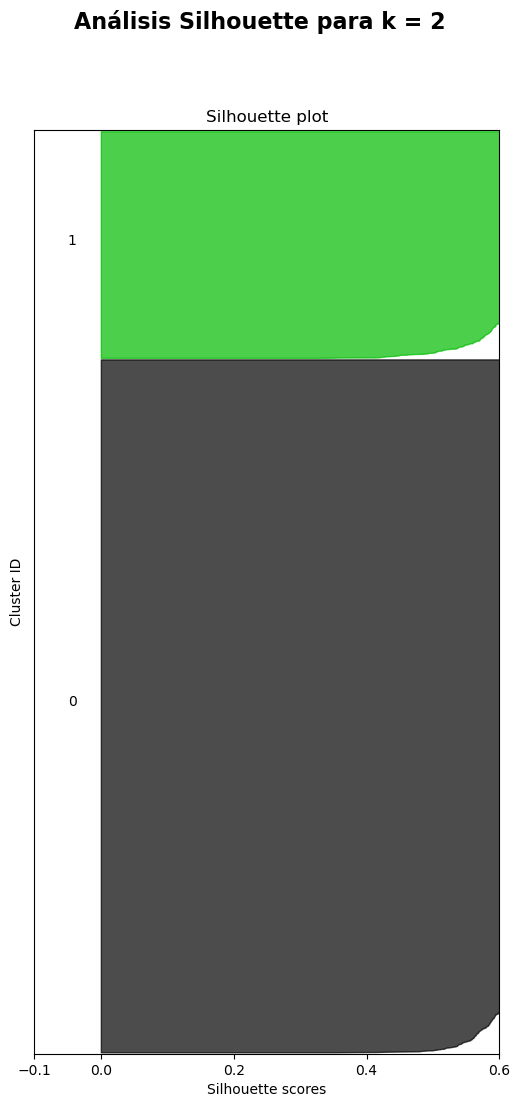

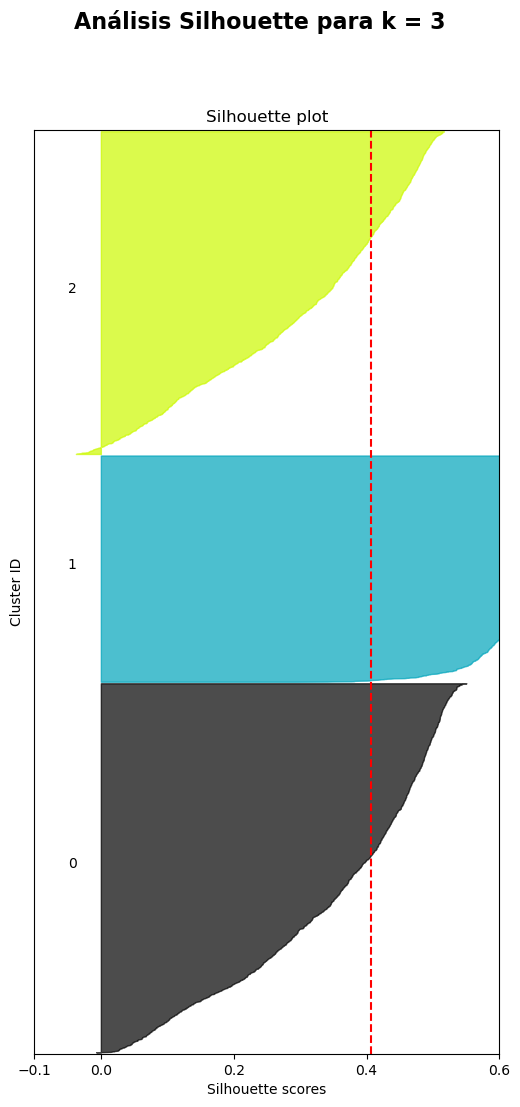

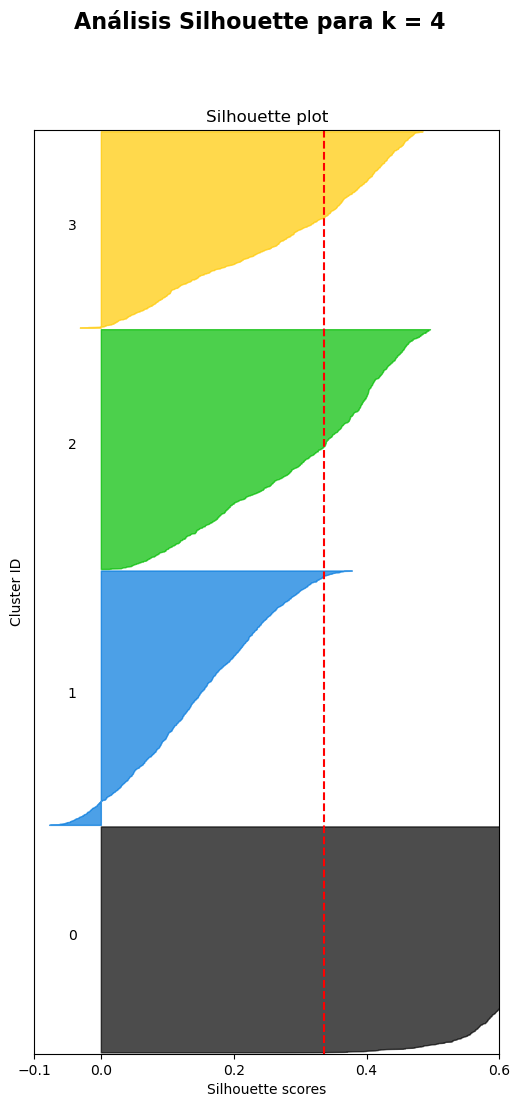

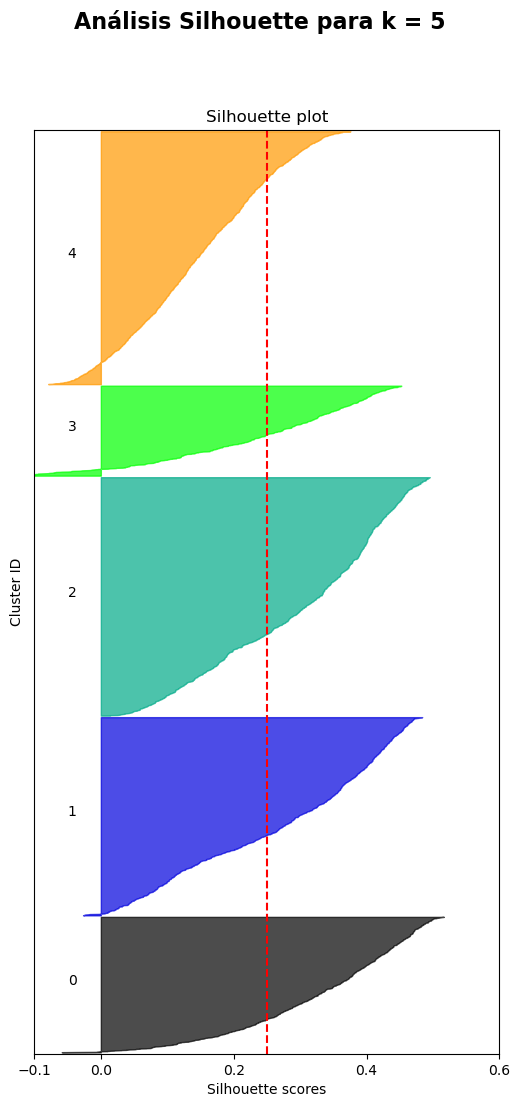

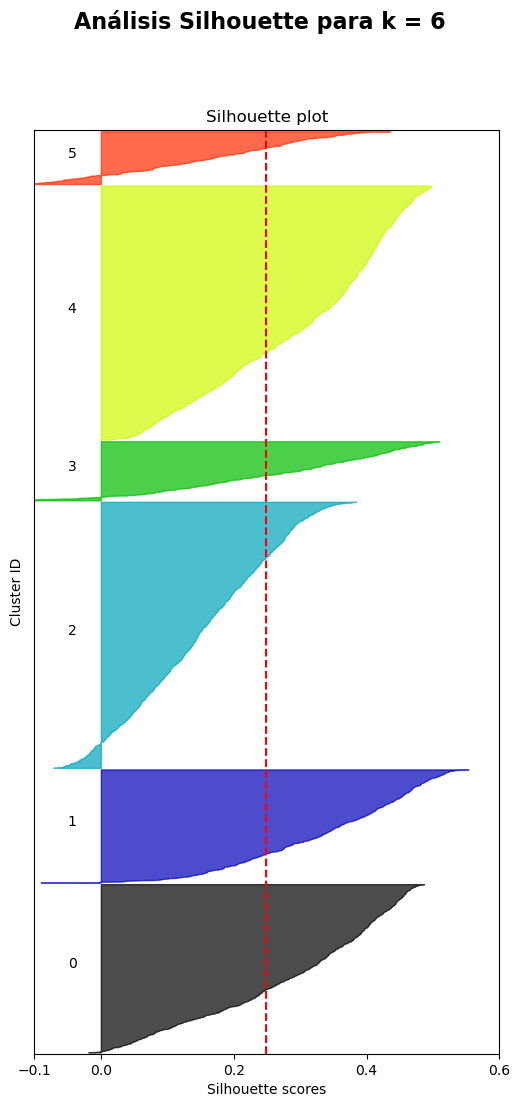

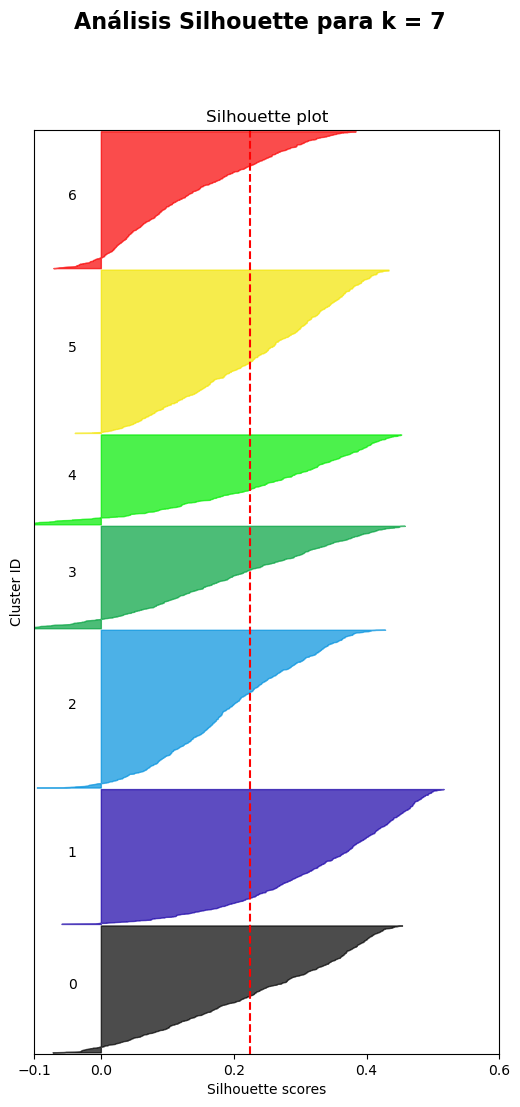

In [58]:
# Obtenemos los valores de k-means para el modelo, y luego graficamos 
# los silhouette scores para cada valor del data set con un valor de k determinado. 
function_k_means(X_reduced)

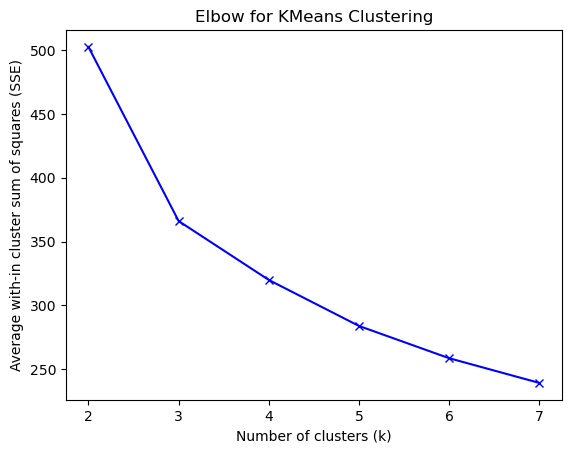

In [59]:
# Graficamos el elbow for k-means para el modelo 
plot_elbow(X_reduced, range_n_clusters)

👉🏻 Dado el grafico obtenidos de silhouette scores para cada dato con respecto a la cantidad de clusters (dentro del rango determinado), podemos definir que el mejor valor de k es para K = 2 en este caso. Ya que, el silhouette score promedio es el mas alto. Esto nos dice que existe una alta congruencia de los datos (se cumple el objetivo 1 y 2). Cada dato pertence correctamente al cluster obtenido, y asimismo se diferencian maracadamente de otros clusters.

👉🏻 Anteriormente declaramos que la cantidad de clusters esperados serian 3. En este caso, al utilizar diferentes valores de k obteniendo sus respectivos silhouettes scores nos permite confirmar que nuestra hipotesis no es del todo correcta. Dado que, de manera general, en base a los embeddings de t-SNE  y UMAP, logramos visualizar 2 grupos grandes de datos, en donde algunos de estos grupos, una pequeña concentracion de datos se desprendia de la agrupacion mas grande, por lo que detalladamente podiamos decir que existian 3 grupos que distribuian los datos del data set. Sin embargo, con respecto al mejor valor promedio de silhouette obtenido, nos dice que los datos presentan una alta congruencia cuando organizamos los datos en 2 clusters. 

Por lo tanto, en base a los resultados obtenidos, podemos decir que la cantidad de clusters que esperabamos no coincide con la calculada. Esto se debe a que, al momento de realizar la clusterizacion, se logra observar que los datos se agrupan de mejor manera en 2 clusters, y no en 3.

### Modelo tecnica t-SNE

Para k=  2 Silhouette score promedio:  0.35077134
Para k=  3 Silhouette score promedio:  0.4496788
Para k=  4 Silhouette score promedio:  0.41995934
Para k=  5 Silhouette score promedio:  0.414471
Para k=  6 Silhouette score promedio:  0.42298454
Para k=  7 Silhouette score promedio:  0.41243583


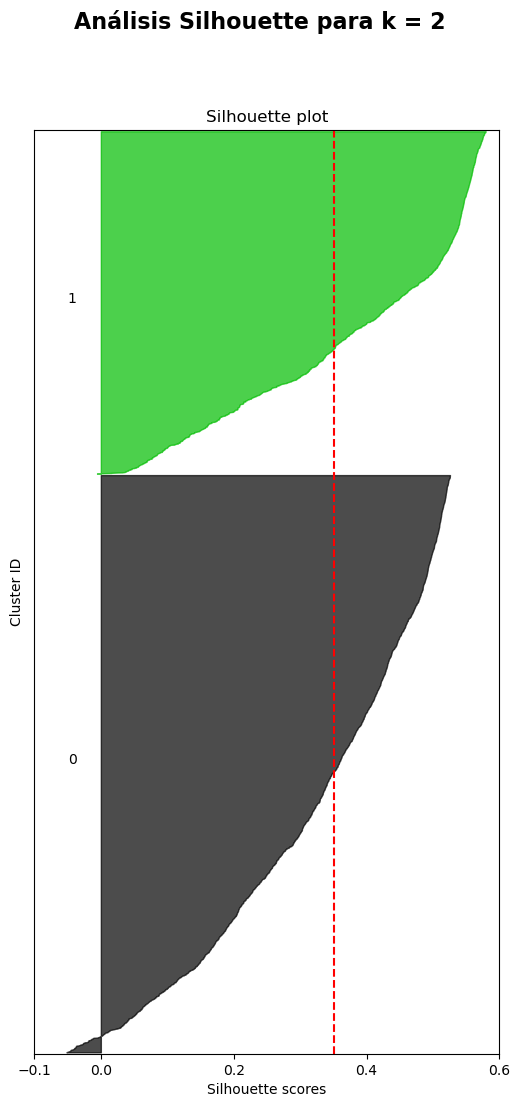

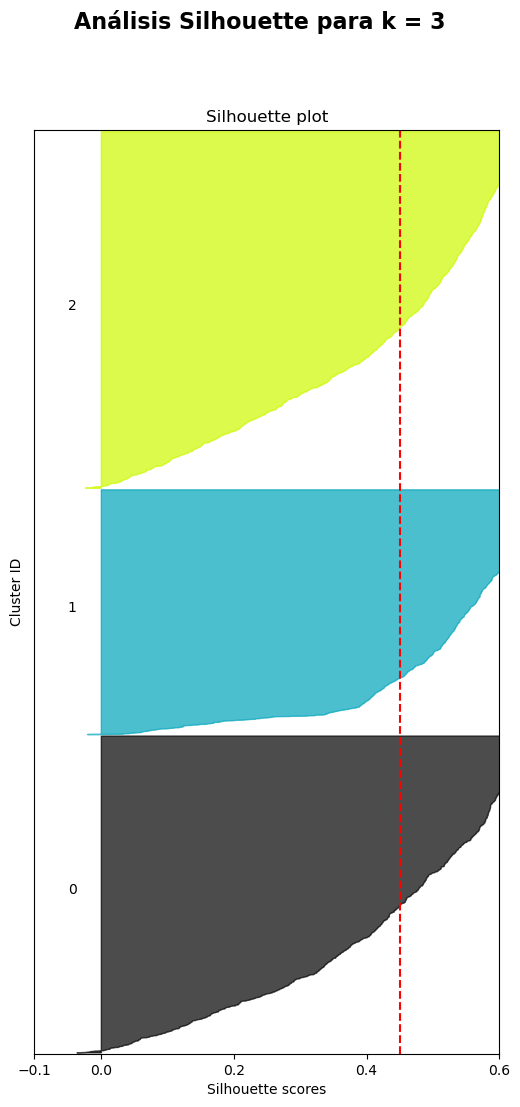

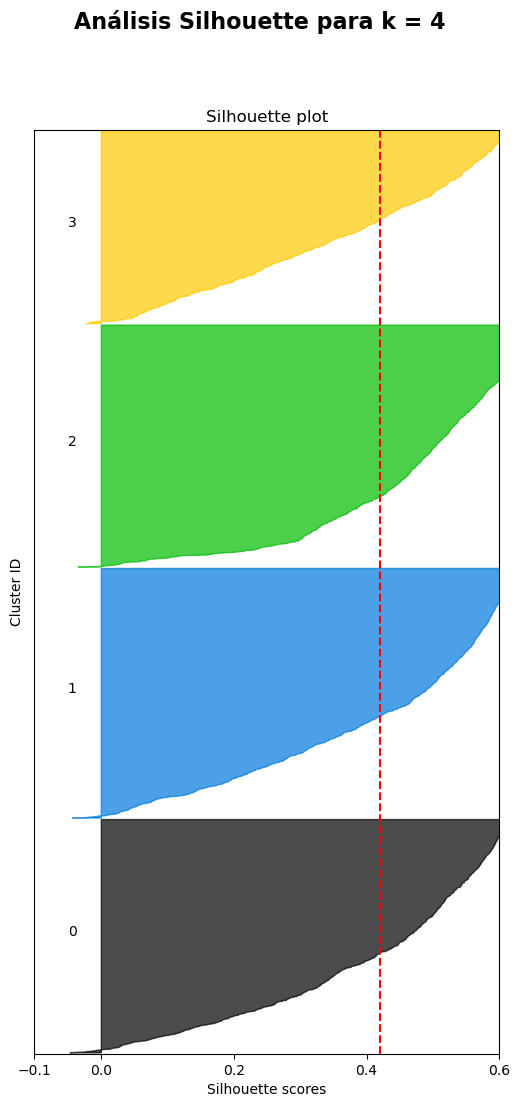

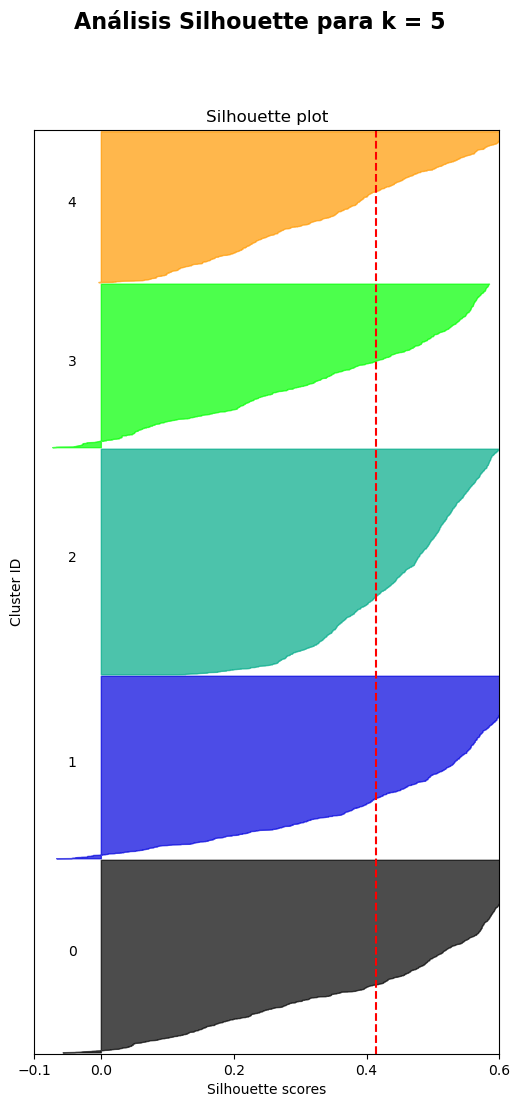

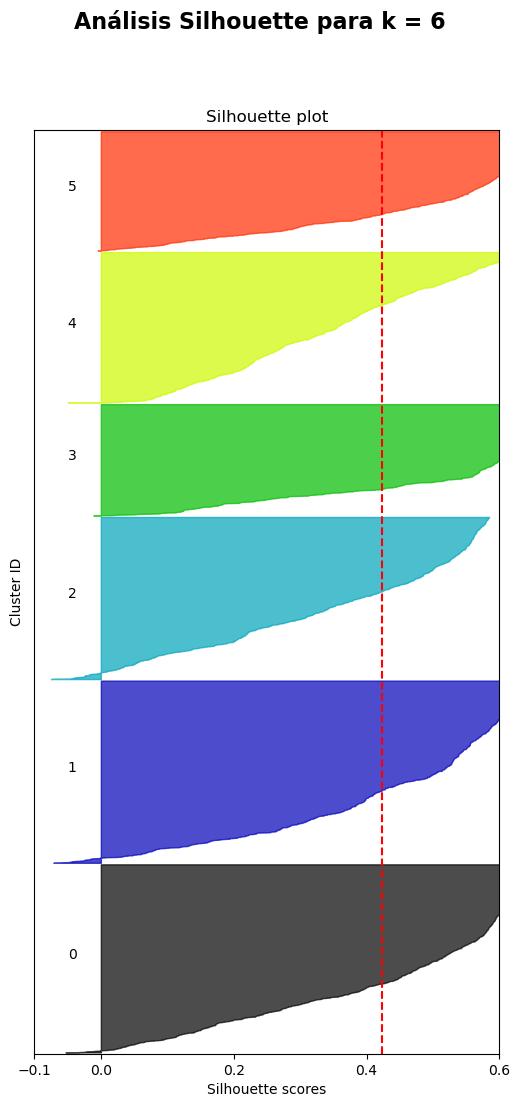

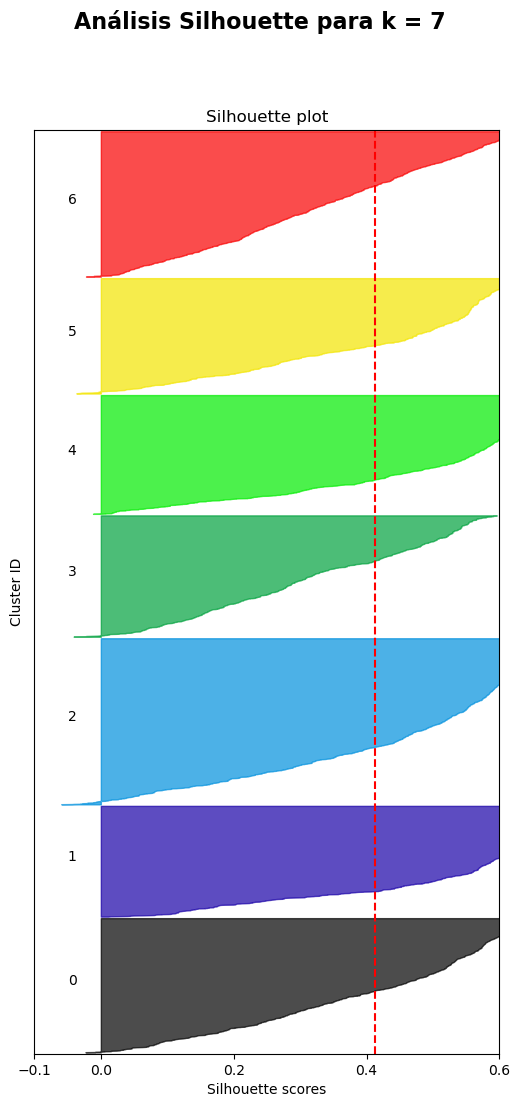

In [60]:
function_k_means(projection_tsne)

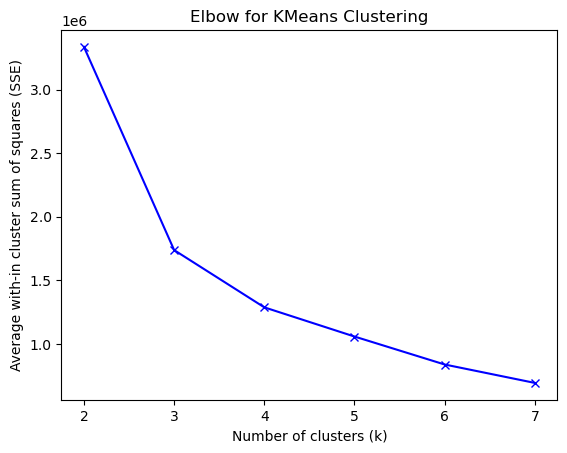

In [61]:
plot_elbow(projection_tsne, range_n_clusters)

👉🏻 La cantidad de clusters optimos a escoger seria para **k = 3**, ya que para este caso, el silhouette promedio correspondiente alcanza un valor maximo en comparacion a los demas. 

👉🏻 La cantidad de clusters para este modelo coincide con el valor esperado de  nuestra hipotesis. En este sentido, esperamos notoriamente una cantidad 3 clusters para grupar los datos en base al embedding de t-SNE de la parte 2.3 del documento. Tal como mencionamos en esa seccion, se visualizan de manera detallada concentraciones de 3 grupos de datos. Por lo que calza con nuestro valor de k optimo obtenido.

### Modelo tecnica UMAP

Para k=  2 Silhouette score promedio:  0.51695937
Para k=  3 Silhouette score promedio:  0.54951805
Para k=  4 Silhouette score promedio:  0.4981419
Para k=  5 Silhouette score promedio:  0.47236383
Para k=  6 Silhouette score promedio:  0.4689178
Para k=  7 Silhouette score promedio:  0.42911205


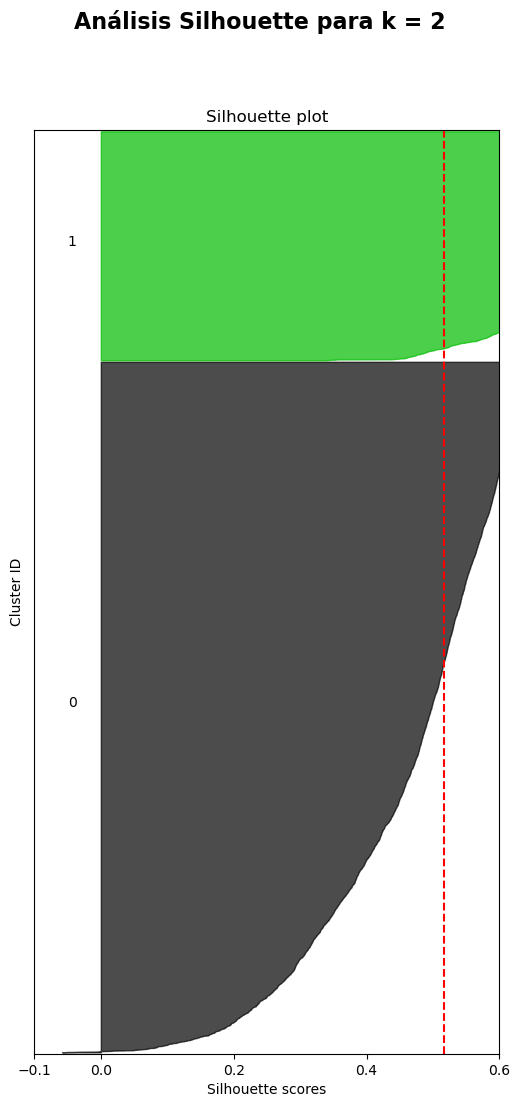

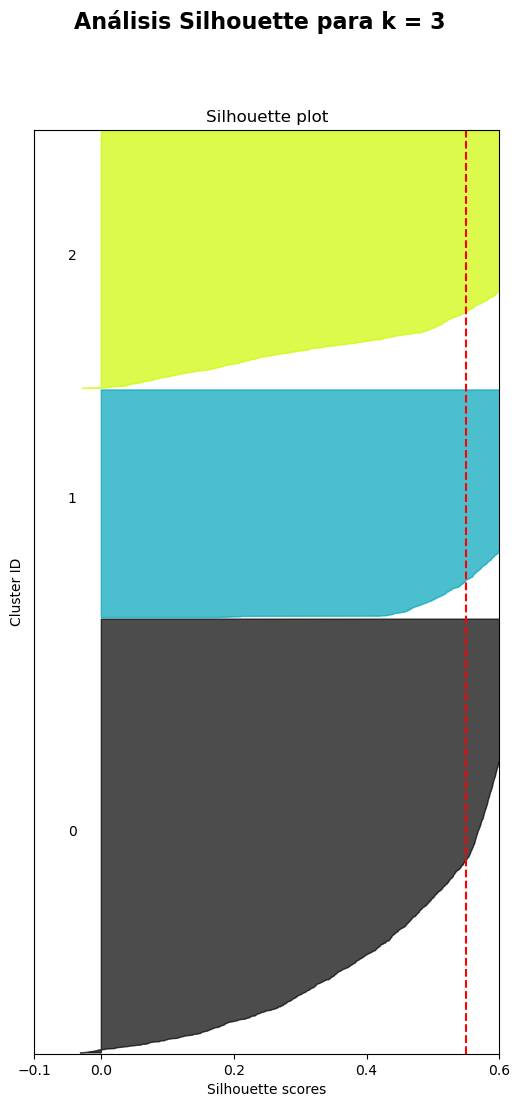

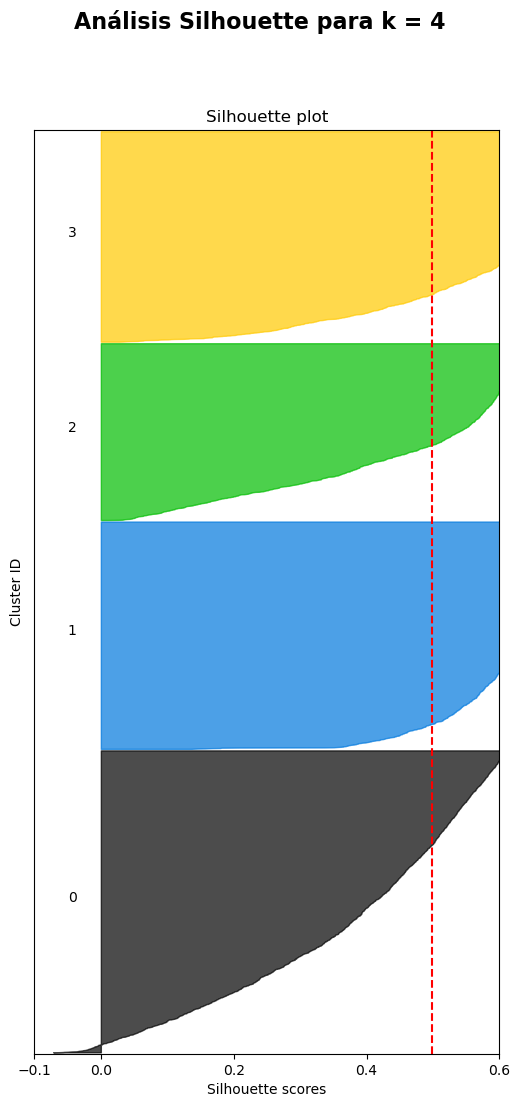

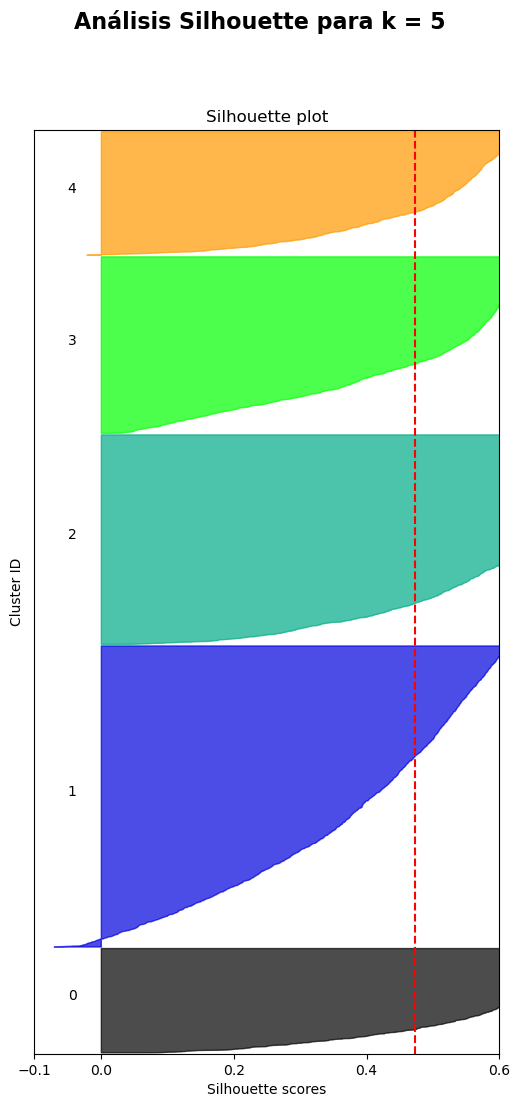

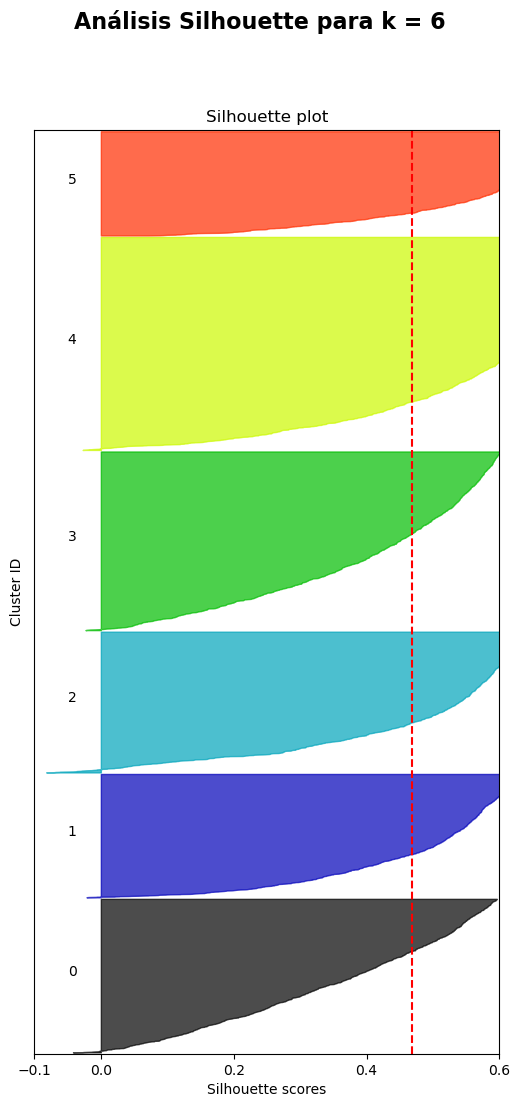

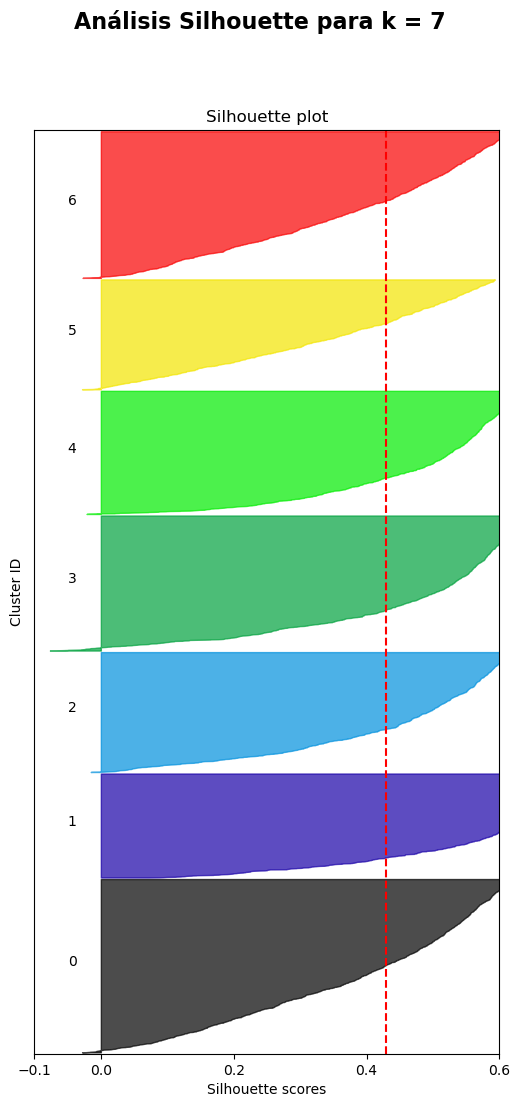

In [62]:
function_k_means(projection_umap)

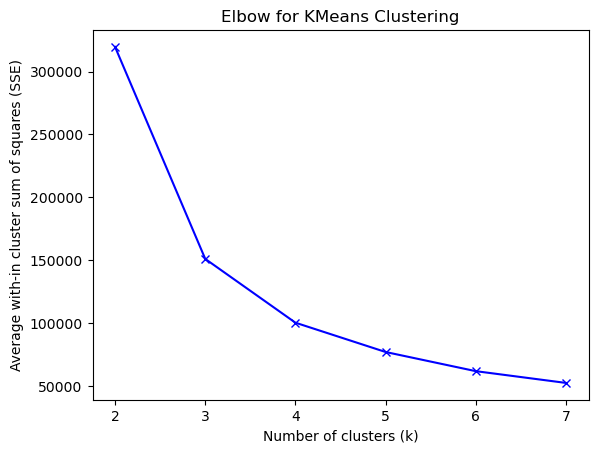

In [300]:
plot_elbow(projection_umap, range_n_clusters)

👉🏻 En este caso, el numeros de clusters optimos a realizar es para un valor de k = 3, ya que en este caso obtenemos el silhouette score promedio mas alto, implicando que los datos se comportan con una alta congruencia y se cumplen los 2 objetivos de clustering con k-means para este caso. 

👉🏻 El valor de k optimo obtenido segun el silhouette score es igual al esperado, el cual mencionamos en la seccion 2.3 del documento. Ya que, como explicamos en aquella seccion, se esperaba que los datos se organizaran en 3 clusters segun el embedding de UMAP (segun la forma en que se distribuian los datos). Para este caso, obtenemos un valor de k optimo exacto. Es decir, los datos se agrupan de mejor manera en 3 clusters. 

# Parte 4: Graficar y Analizar (18 pts.)

En esta sección se espera que grafiques las clusterizaciones producidas por K-Means. Para ello, considera lo siguiente:
* Se debe utilizar t-SNE y UMAP para visualizar las clusterizaciones en dos dimensiones. (Decide cual de las dos utilizar para mostrar los resultados de PCA) **(3 pts. por cada gráfico)**
* Se recomienda asociar cada punto a un cluster mediante un color distintivo. Para ello se recomienda investigar de `matplotlib.cm`.

Finalmente, analiza los tres gráficos. Compáralos y describe en qué medida se diferencian. Relaciona esto con los modelos que utilizaste. **(9 pts.)**

In [63]:
# Definiremos la siguiente funcion que permite representar los datos asociados a cada cluster. 
# En el caso de t-SNE  y UMAP considerarmos una cantidad de 3 clusters, mientras que para PCA consideraremos 2 clusters. 

colors = cm.viridis(np.linspace(0, 1, 3))
def plot_clusters(X, k, title):
    kmeans = KMeans(n_clusters=k) # cantidad de clusters
    cluster = kmeans.fit_predict(X) # retorna el cluster que pertenece cada dato

    plt.figure(figsize=(12, 5)) 
    plt.subplot(1, 2, 1)
    for i in range(k):
        plt.scatter(X[cluster == i, 0], X[cluster == i, 1], c=[colors[i]], label=f'Cluster {i}') # graficamos los datos segun el cluster que pertenecen
    plt.title(title)
    plt.legend() # graficamos la leyenda segun al cluster que pertenece cada dato

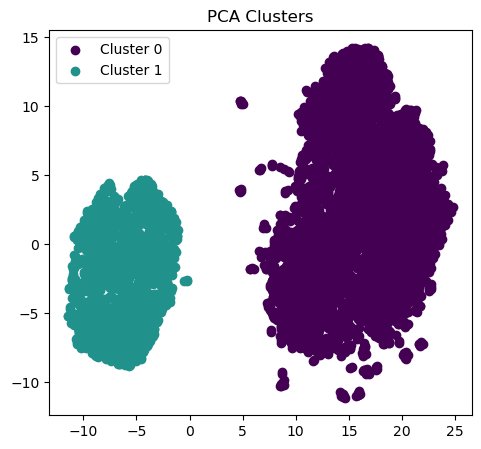

In [64]:
# Grafico para clusterizacion producida pro K-means para modelo PCA con 95% de varianza retenida
# Escogeremos el modelo UMAP para graficar los resultados de PCA 
projection_X_reduced = umap_2d.fit_transform(X_reduced, y)
plot_clusters(projection_X_reduced, 2, 'PCA Clusters') # Dado el score de silhoutte, escogemos 2 clusters para PCA

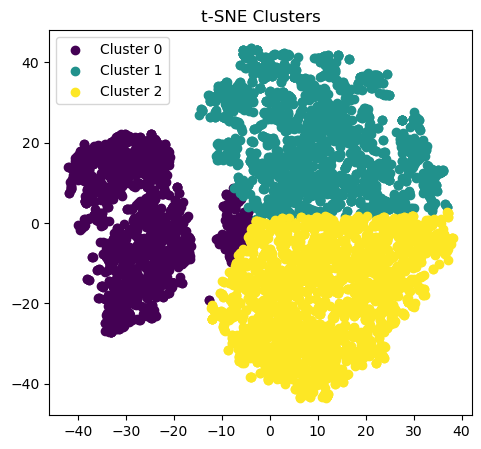

In [68]:
# Grafico para modelo t-SNE
# Dado el score de silhoutte, escogemos 3 clusters para t-SNE
plot_clusters(projection_tsne, 3, 't-SNE Clusters') # Consideramos tsne_embed = manifold.TSNE(n_components=2, perplexity = 50, n_iter=500, n_iter_without_progress=150, n_jobs=10)

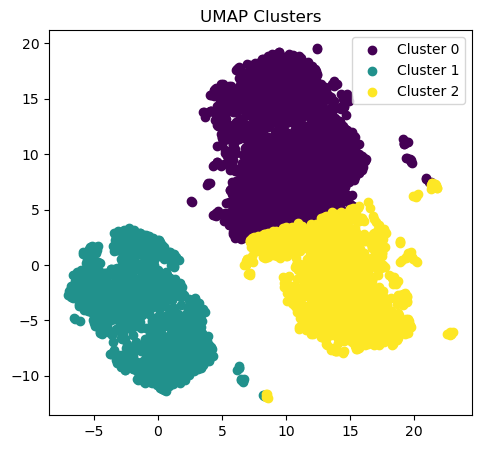

In [66]:
# Grafoco para modelo UMAP
# Dado el score de silhoutte, escogemos 3 clusters para UMAP
plot_clusters(projection_umap, 3, 'UMAP Clusters') # Consideramos umap_2d = UMAP(n_components = 2, min_dist = 1, n_neighbors= 50, n_jobs=8)

Con respecto a los 3 graficos obtenidos, podemos notar que los datos se agrupan de manera distinta en cada uno de ellos. En primer lugar, si verificamos la correspondencia
de la agrupacion de los datos graficamente y el valor de k utilizado, podemos verificar que se agrupan correctamente cada dato con respecto al centroide del cluster al que pertenece.
El grafico de PCA se diferencia principalmente de los otros 2 graficos por la cantidad de clusters que utilizamos (2 en este caso), y asimismo los 2 clusteres se encuentran mas separados entre si. En el caso de los modelos UMAP y t-SNE, se realizaron 3 clusters y podemos visualizar que los datos se agrupan de una manera 'mas dispersa' que en comparacion de PCA. En especifico, los datos del modelo implementado con t-SNE abarca mas espacio que los otros dos modelos. Esta caracteristica se puede explicar en base al objetivo que presenta la tecnica t-SNE, el cual es 
mantener la distancia original entre datos desde el espacio de mayor dimensionalidad al de menor dimensionalidad. 

Otra caracteristica que podemos notar es que en el grafico del Modelo con la tecnica PCA, los datos se encuentras mucho mas concentrados que el resto de los modelos. Esto se puede explicar en base al objetivo que presenta la tecnica PCA, el cual es reducir la dimensionalidad de los datos, pero manteniendo la varianza de los datos. Por lo que, al momento de graficar los datos, estos se encuentran mas concentrados en un espacio de menor dimensionalidad. 

Finalmente, para el caso de UMAP, los datos no se encuentran ni tan dispersos, y ni tan concentrados como los otros dos modelos. Pero, como el objetivo de UMAP es mantener la estructura local 
de los datos desde el espacio con mayor dimensionalidad, podemos verificar que seria una proyeccion 'mas acorde' con respecto a la distribucion original del set de datos. Ademas, estos datos se encuentran mas ordenados que los otros dos modelos, y podemos identificar que presenta un cierto grado de similud con el modelo de PCA, pero con una mayor dispersion de los datos.